# Validating NN Model

Using validation curves to validate the model performance 

In [1]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# from init_NN import NeuralNetwork

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.001 using Gradient Descent

In [2]:
lr = 0.001
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns

nn_lr001_gd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)
losses = nn_lr001_gd.train(training_images, training_labels, epochs = 10, batch_size=len(training_images), debug=True)
nn_lr001_gd_cross_ent_error, nn_lr001_gd_classification_error = nn_lr001_gd.test(test_images, test_labels)

 10%|█         | 1/10 [00:42<06:18, 42.05s/it]

epoch loss:  653.4931546797834


 20%|██        | 2/10 [01:26<05:47, 43.49s/it]

epoch loss:  541.4554440690094


 30%|███       | 3/10 [02:09<05:01, 43.03s/it]

epoch loss:  479.7810749052651


 40%|████      | 4/10 [02:49<04:11, 41.86s/it]

epoch loss:  442.34317117570896


 50%|█████     | 5/10 [03:31<03:30, 42.06s/it]

epoch loss:  415.49381117486047


 60%|██████    | 6/10 [04:12<02:46, 41.68s/it]

epoch loss:  394.3185818411254


 70%|███████   | 7/10 [04:55<02:06, 42.22s/it]

epoch loss:  376.7995544584793


 80%|████████  | 8/10 [05:37<01:23, 41.92s/it]

epoch loss:  361.9800292242491


 90%|█████████ | 9/10 [06:19<00:42, 42.11s/it]

epoch loss:  349.1458892239018


100%|██████████| 10/10 [06:58<00:00, 41.88s/it]


epoch loss:  337.8816295106051
Average cross entropy loss: 323.2061399077543
Classification accuracy: 12.540000000000001%


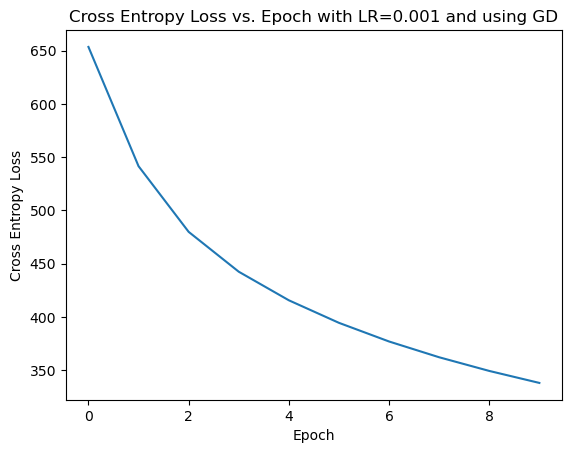

In [3]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.001 and using GD')
plt.show()

In [4]:
error_summary = stats.describe(nn_lr001_gd_cross_ent_error)
print("mean: ", np.mean(nn_lr001_gd_cross_ent_error))
print("median: ", np.median(nn_lr001_gd_cross_ent_error))
print("min: ", np.min(nn_lr001_gd_cross_ent_error))
print("max: ", np.max(nn_lr001_gd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr001_gd_cross_ent_error, q=[10, 25, 50, 75, 90]))
# print("mean: ", np.median(test_loss))

mean:  323.2061399077543
median:  286.0475089664045
min:  -0.0
max:  2004.6824739889785
variance:  71986.88743377654
skewness:  1.0877610120615506
kurtosis:  1.9391342468966632
quartile:  [2.88657986e-15 1.08580091e+02 2.86047509e+02 4.79600168e+02
 6.75434045e+02]


In [5]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN
from scipy import stats
import numpy as np

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = len(training_data)

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.001
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, input_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


1it [00:06,  6.09s/it][00:00<?, ?it/s]
 10%|█         | 1/10 [00:06<00:54,  6.10s/it]

batch loss:  [2.3004002571105957]
epoch loss:  2.3004002571105957


1it [00:06,  6.21s/it]
 20%|██        | 2/10 [00:12<00:49,  6.17s/it]

batch loss:  [2.300370454788208]
epoch loss:  2.300370454788208


1it [00:06,  6.14s/it]
 30%|███       | 3/10 [00:18<00:43,  6.16s/it]

batch loss:  [2.3003406524658203]
epoch loss:  2.3003406524658203


1it [00:05,  5.99s/it]
 40%|████      | 4/10 [00:24<00:36,  6.09s/it]

batch loss:  [2.3003103733062744]
epoch loss:  2.3003103733062744


1it [00:06,  6.44s/it]
 50%|█████     | 5/10 [00:30<00:31,  6.22s/it]

batch loss:  [2.300281047821045]
epoch loss:  2.300281047821045


1it [00:04,  4.98s/it]
 60%|██████    | 6/10 [00:35<00:23,  5.80s/it]

batch loss:  [2.300250768661499]
epoch loss:  2.300250768661499


1it [00:04,  4.23s/it]
 70%|███████   | 7/10 [00:40<00:15,  5.29s/it]

batch loss:  [2.300220489501953]
epoch loss:  2.300220489501953


1it [00:04,  4.10s/it]
 80%|████████  | 8/10 [00:44<00:09,  4.91s/it]

batch loss:  [2.3001909255981445]
epoch loss:  2.3001909255981445


1it [00:04,  4.09s/it]
 90%|█████████ | 9/10 [00:48<00:04,  4.66s/it]

batch loss:  [2.300161123275757]
epoch loss:  2.300161123275757


1it [00:04,  4.07s/it]
100%|██████████| 10/10 [00:52<00:00,  5.24s/it]

batch loss:  [2.3001315593719482]
epoch loss:  2.3001315593719482
Training complete.


[2.3004002571105957,
 2.300370454788208,
 2.3003406524658203,
 2.3003103733062744,
 2.300281047821045,
 2.300250768661499,
 2.300220489501953,
 2.3001909255981445,
 2.300161123275757,
 2.3001315593719482]

In [6]:

##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

Average cross entropy loss: 2.2987971
Classification accuracy: 9.65%


C:\Users\pcher\AppData\Roaming\Python\Python310\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [7]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  2.2987971
median:  2.2987971
min:  2.2987971
max:  2.2987971
variance:  nan
skewness:  nan
kurtosis:  nan
quartile:  [2.29879713 2.29879713 2.29879713 2.29879713 2.29879713]


C:\Users\pcher\AppData\Local\Temp\ipykernel_27220\44925478.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  error_summary = stats.describe(cross_ent_errors)
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1522: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
c:\ProgramData\anaconda3\lib\site-packa